In [1]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
import re

### Enter inputs below

In [2]:
ticker = "0P00006ONO.SI" # Does not handle currency conversion so do not mix stocks here
start_date = "2019-01-01" #YYYY-MM-DD
end_date = dt.date.today() #YYYY-MM-DD
working_day = 7 # nth + 1 working day of the month, E.g 7 = 8th working day of month
monthly_invest = 1000 # Amount you want to invest each month
start_val = 100000 # ignore this if you are using monthly invest

### Get data from Yahoo Finance

In [3]:
df = yf.download(ticker, start=start_date, end=end_date)["Adj Close"]
df = df.ffill().bfill()
#print(df.head())

[*********************100%***********************]  1 of 1 completed


In [4]:
df2 = df.groupby(pd.Grouper(freq='MS')).nth(n=working_day) # n = nth + 1 working day of month
#df2.head()

In [5]:
port_list = str.split(ticker)
port_name = {i : yf.Ticker(i).info['shortName'] for i in port_list}

### Compute Dollar Weighted Average & Lump Sum Investing

In [6]:
mth = df2.shape[0]
sv = start_val
monthly_amount = sv/mth
df3 = df2.copy()
df3 = pd.DataFrame(df2)
ns = [math.floor((monthly_invest/df2[i])) for i in range(mth)]
ns_total = sum(ns)

df3["Num Shares"] = ns
df3["Total Cost of Shares"] = round(df3["Adj Close"] * df3["Num Shares"],3)
df3["Shares Owned"] = df3["Num Shares"].cumsum()
ave_cost = sum(df3["Total Cost of Shares"])/sum(df3["Num Shares"])
dwa_total_cost = round(ns_total * ave_cost,2)
dwa_port = round(ns_total * df[-1],2)
dwa_cr = round(((dwa_port/dwa_total_cost)-1)*100,2)

ls_ns = math.floor((monthly_invest * df3.shape[0])/df[0])
ls_total_cost = round(ls_ns * df[0],2)
ls_port = round(ls_ns * df[-1],2)
ls_cr = round(((ls_port/ls_total_cost)-1)*100,2)

Start Date: 2019-01-01
End Date: 2020-12-27
Fund Name: FSSA Dividend Advantage Fund Cl

Lump Sum Investing has 14399 shares
Lump Sum Investing cost of share is $1.67
Lump Sum Investing total cost of share is $23998.89
Lump Sum Investing ending portfolio value is $32078.09
Lump Sum Investing cumulative return is 33.66%

Dollar Weighted Average has 12675 shares
Dollar Weighted Average cost of share is $1.89
Dollar Weighted Average total cost of share is $23978.99
Dollar Weighted Average ending portfolio value is $28237.36
Dollar Weighted Average cumulative return is 17.76%



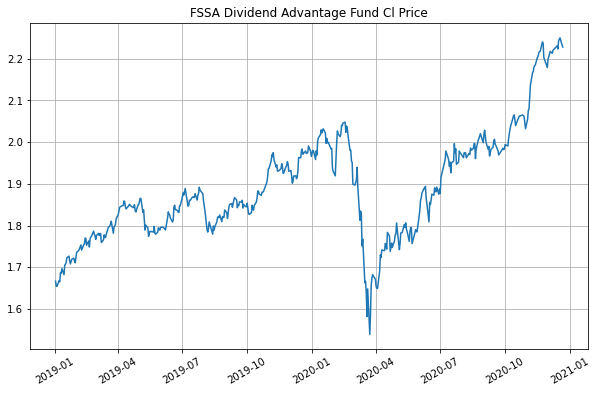

In [7]:
plt.figure(figsize=[10,6])
plt.plot(df)
plt.title("{} Price".format(port_name.get(ticker)))
plt.xticks(rotation=30)
plt.grid()
print("Start Date: {}".format(start_date))
print("End Date: {}".format(end_date))
print("Fund Name: {}".format(port_name.get(ticker)))
print("")
print("Lump Sum Investing has {} shares".format(ls_ns))
print("Lump Sum Investing cost of share is ${}".format(round(df[0],2)))
print("Lump Sum Investing total cost of share is ${}".format(ls_total_cost))
print("Lump Sum Investing ending portfolio value is ${}".format(ls_port))
print("Lump Sum Investing cumulative return is {}%".format(ls_cr))
print("")
print("Dollar Weighted Average has {} shares".format(ns_total))
print("Dollar Weighted Average cost of share is ${}".format(round(ave_cost,2)))
print("Dollar Weighted Average total cost of share is ${}".format(dwa_total_cost))
print("Dollar Weighted Average ending portfolio value is ${}".format(dwa_port))
print("Dollar Weighted Average cumulative return is {}%".format(dwa_cr))
print("")

### Table for Dollar Weighted Average

In [8]:
print(df3)
print("")
print("Dollar Weighted Average has {} shares".format(ns_total))
print("Dollar Weighted Average cost of share is ${}".format(round(ave_cost,2)))
print("Dollar Weighted Average total cost of share is ${}".format(dwa_total_cost))
print("Dollar Weighted Average ending portfolio value is ${}".format(dwa_port))
print("Dollar Weighted Average cumulative return is {}%".format(dwa_cr))
print("")

            Adj Close  Num Shares  Total Cost of Shares  Shares Owned
Date                                                                 
2019-01-01   1.696848         589               999.444           589
2019-02-01   1.769401         565               999.711          1154
2019-03-01   1.777768         562               999.106          1716
2019-04-01   1.857872         538               999.535          2254
2019-05-01   1.794864         557               999.739          2811
2019-06-01   1.825215         547               998.393          3358
2019-07-01   1.848077         541               999.810          3899
2019-08-01   1.799081         555               998.490          4454
2019-09-01   1.852928         539               998.728          4993
2019-10-01   1.836841         544               999.241          5537
2019-11-01   1.945334         514               999.902          6051
2019-12-01   1.916226         521               998.354          6572
2020-01-01   2.01799